<img typeof="foaf:Image" src="indata/ANTI-INFECTIVES-RGB_200pc.png" alt="Wellcome Centre for Anti-Infectives Research" title="">

# Analysis of Protein Turnover in <i>T. brucei</i>

Michele Tinti

Wellcome Centre for Anti-Infectives Research
School of Life Sciences, University of Dundee


In [1]:
#import library

#computing
import os
import pandas as pd
import numpy as np
from scipy import stats

#plotting
import matplotlib.pyplot as plt

#some ad-hoc scripts
from utilities.utilities import print_result, clean_id, clean
import warnings

## Analysis Start
This is the second notebook for the analysis of the protein turnover in T. brucei. In here we process the PCF data.
### Setting up
<ul>
    <li>Download data files from
        <a href="https://uod.box.com/s/gdqrld2i3n1xun0kkot4mfq3bgg2w54b">here</a>
    </li>
    <li>in the same folder were this notebook sits create a new "indata" folder
    </li>
    <li>Move the data files to the "indata" folder
    </li>    
</ul> 

In [2]:
#set some variable to extract the data
#3 biological replicates
_TAG_REPLICA=['_A' , '_B', '_C']

#7 time points for BS
#these are the headers
_TAG=['0h','025h','0.5h','1h', '2h','4h','8h','20h','28h' ]
#these are the growth factors
_GROWTH_FACTOR=np.ones(27)#[1.00,1.00,1.00,1.02,1.04,1.10,1.20,1.80,2.40,
                #1.00,1.00,0.98,0.99,1.04,1.10,1.20,1.80,2.50,
                #1.00,1.00,0.98,0.99,0.99,1.20,1.20,1.80,2.40]

#experiment time points
_Hours=[0, 0.25, 0.5, 1, 2, 4, 8, 20, 28]

### Read and clean MaxQuant output

In [3]:
#read the dataset
df= pd.read_table(os.path.join('indata','combined_noreq_pc','txt','proteinGroups.txt'), low_memory=False)
df=clean(df)
#for simplicity lets just work with the leading protein
df['protein_id']=[clean_id(n) for n in df['Protein IDs']]
df.set_index('protein_id', inplace=True)
print (df.shape)
df.head()

/Users/mtinti/miniconda3/envs/prediction/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


(6466, 790)
removed  189 Only identified by site
tot  189  entries removed
---------------
removed  62 Reverse
tot  251  entries removed
---------------
removed  114 Potential contaminant
tot  365  entries removed
---------------
removed  206 Peptide counts (all)
tot  571  entries removed
---------------
(5895, 791)


,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Fasta headers,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,...,id,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions,unique
protein_id,,,,,,,,,,,,,,,,,,,,,
Tb927.5.4450,Tb927.5.4450:mRNA-p1;Tb05.5K5.100:mRNA-p1,Tb927.5.4450:mRNA-p1;Tb05.5K5.100:mRNA-p1,6;6,6;6,6;6,Tb927.5.4450:mRNA-p1 | transcript=Tb927.5.4450...,2,6,6,6,...,274,8644;14925;32904;32905;34616;46726,True;True;True;True;True;True,9278;16024;35077;35078;36883;50554,205212;205213;205214;205215;339553;339554;3395...,277878;277879;277880;277881;277882;458125;4581...,277879;458176;963659;963667;1008605;1343190,275,136,6
Tb927.5.4460,Tb927.5.4460:mRNA-p1;Tb05.5K5.110:mRNA-p1,Tb927.5.4460:mRNA-p1;Tb05.5K5.110:mRNA-p1,32;32,32;32,15;15,Tb927.5.4460:mRNA-p1 | transcript=Tb927.5.4460...,2,32,32,15,...,275,1755;2199;3023;5134;7280;9924;13818;17505;1851...,True;True;True;True;True;True;True;True;True;T...,1890;2359;3233;5548;7838;10668;14790;18756;198...,46699;46700;46701;46702;46703;46704;46705;4670...,64532;64533;64534;64535;64536;64537;64538;6453...,64543;77925;106406;171291;240109;311083;426583...,276;277,405;828,32
Tb927.5.4470,Tb927.5.4470:mRNA-p1;Tb05.5K5.120:mRNA-p1,Tb927.5.4470:mRNA-p1;Tb05.5K5.120:mRNA-p1,20;20,20;20,20;20,Tb927.5.4470:mRNA-p1 | transcript=Tb927.5.4470...,2,20,20,20,...,276,105;1329;2905;4007;6498;6771;13656;14080;15492...,True;True;True;True;True;True;True;True;True;T...,120;1433;3102;4269;7008;7297;14623;15073;16627...,3058;3059;3060;3061;3062;3063;3064;3065;3066;3...,4362;4363;4364;4365;4366;4367;4368;4369;4370;4...,4368;53170;101960;134362;217270;227466;421884;...,278,551,20
Tb927.5.4480,Tb927.5.4480:mRNA-p1;Tb05.5K5.130:mRNA-p1,Tb927.5.4480:mRNA-p1;Tb05.5K5.130:mRNA-p1,41;41,41;41,41;41,Tb927.5.4480:mRNA-p1 | transcript=Tb927.5.4480...,2,41,41,41,...,277,4837;4838;6401;7007;10036;10516;11187;12159;13...,True;True;True;True;True;True;True;True;True;T...,5226;5227;6901;6902;7548;10788;11301;12006;130...,119694;119695;119696;119697;119698;119699;1197...,163002;163003;163004;163005;163006;163007;1630...,163018;163077;211861;234019;315209;328786;3520...,279;280;281;282;283;284;285;286;287;288,88;100;176;207;225;227;283;324;349;579,41
Tb927.5.4500,Tb927.5.4500:mRNA-p1;Tb05.5K5.150:mRNA-p1,Tb927.5.4500:mRNA-p1;Tb05.5K5.150:mRNA-p1,9;9,9;9,9;9,Tb927.5.4500:mRNA-p1 | transcript=Tb927.5.4500...,2,9,9,9,...,278,6743;27677;31966;45514;55901;57087;59951;61304...,True;True;True;True;True;True;True;True;True,7268;29561;34103;49302;60319;60320;61611;64698...,165780;165781;165782;165783;165784;165785;1657...,225960;225961;225962;225963;225964;225965;2259...,225960;814999;943968;1327898;1605192;1641212;1...,289;290;291,71;112;146,9


In [4]:
len(df.columns)

791

In [5]:
ids_dict =  dict(zip(df.index.values,df['Protein IDs'].values))
for key in ids_dict.keys():
    temp = ids_dict[key]
    temp = temp.split(';')
    temp = [clean_id(n) for n in temp]
    ids_dict[key]=temp

def grab(x):
    x=str(x).split(';')
    temp_id='none'
    temp_desc='none'
    for n in x:
        if 'ID=' in n:
            temp_id=n.replace('ID=','')
        if 'description=' in n:
            temp_desc=n.replace('description=','')
            temp_desc=temp_desc.replace('%2C',',')
    return temp_id,temp_desc
            
gff = pd.read_table('indata/genome/TriTrypDB-41_TbruceiTREU927.gff', header=None)
desc_diz = {}
for n in gff.iloc[:,-1]:
    temp = grab(n)
    desc_diz[temp[0]]=temp[1]
for item in ids_dict['Tb927.5.4450']:
    print (item,desc_diz[item] )

import pickle
with open('ids_dict_pcf.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(ids_dict, f, pickle.HIGHEST_PROTOCOL)    

/Users/mtinti/miniconda3/envs/prediction/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.


Tb927.5.4450 hypothetical protein, conserved
Tb05.5K5.100 hypothetical protein, conserved


## Missing Data Analysis

In [6]:
cols1 = [ 'Ratio H/M {tp}{rep}'.format(tp=tp, rep=rep) for rep in _TAG_REPLICA for tp in _TAG]
data1 = df[cols1]
#remove all na
data1= data1[data1.isna().sum(axis=1)<27]

cols2 = [ 'Ratio H/L {tp}{rep}'.format(tp=tp, rep=rep) for rep in _TAG_REPLICA for tp in _TAG]
data2 = df[cols2]
data2= data2[data2.isna().sum(axis=1)<27]

cols3 = [ 'Ratio M/L {tp}{rep}'.format(tp=tp, rep=rep) for rep in _TAG_REPLICA for tp in _TAG]
data3 = df[cols3]
data3= data3[data3.isna().sum(axis=1)<27]


## Missing Data Analysis
This part liiks at the missing data points pattern. We expect less quantifications happening at the beginning (less ligh label peptides) and at the end of the experiment (less medium label peptides)

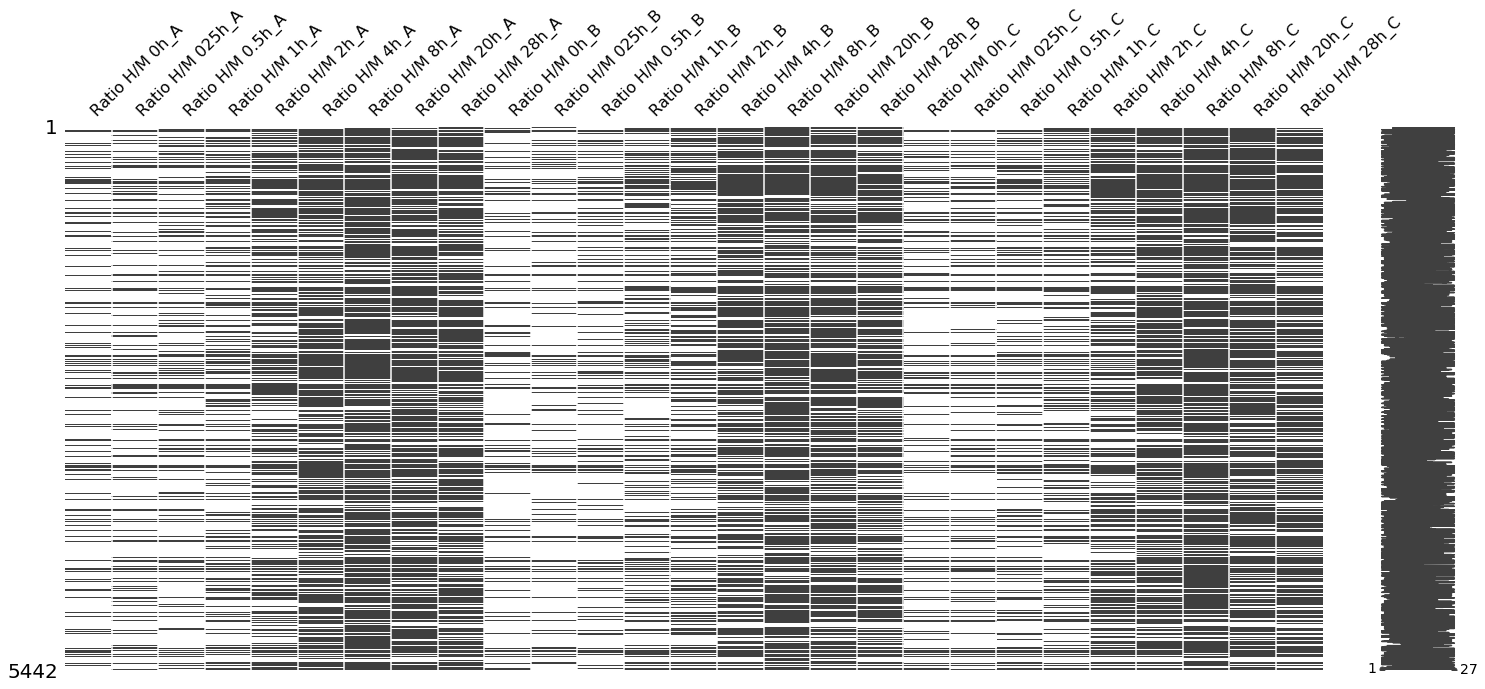

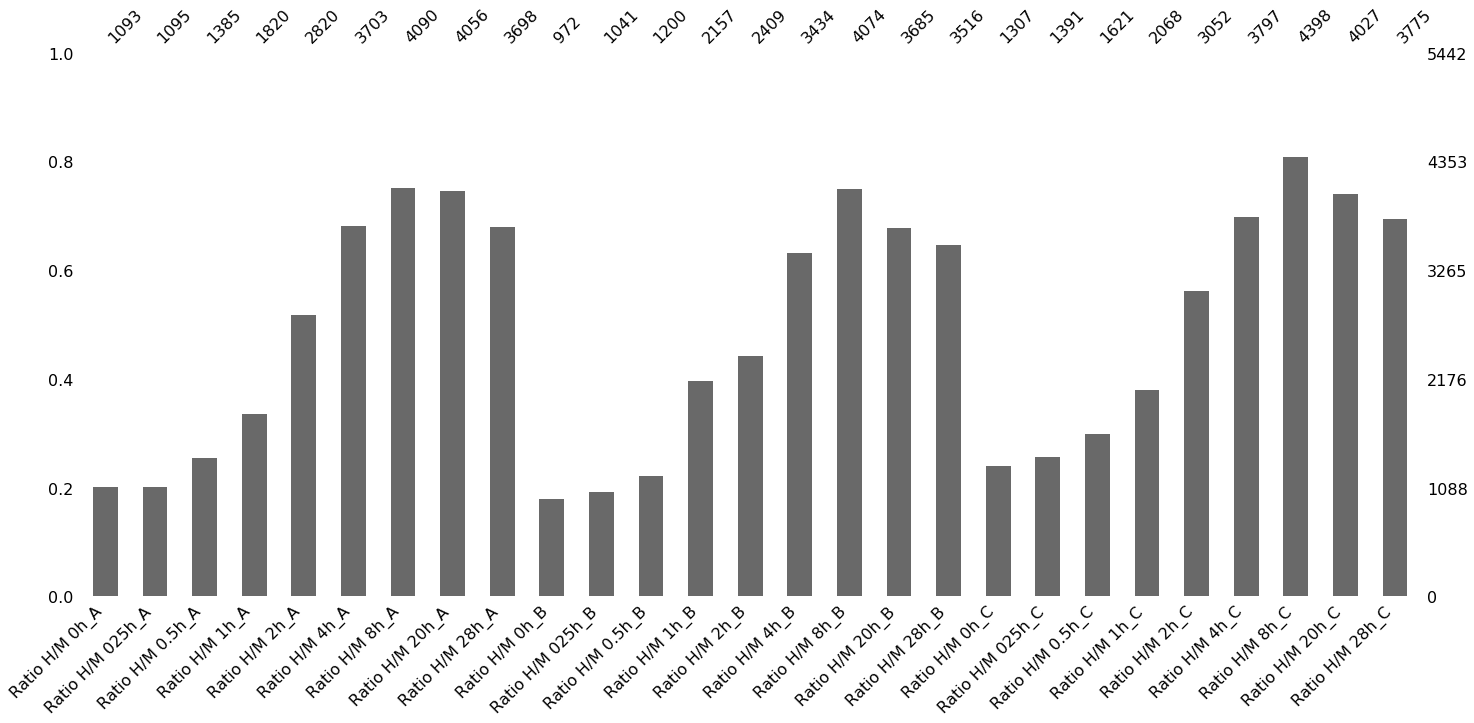

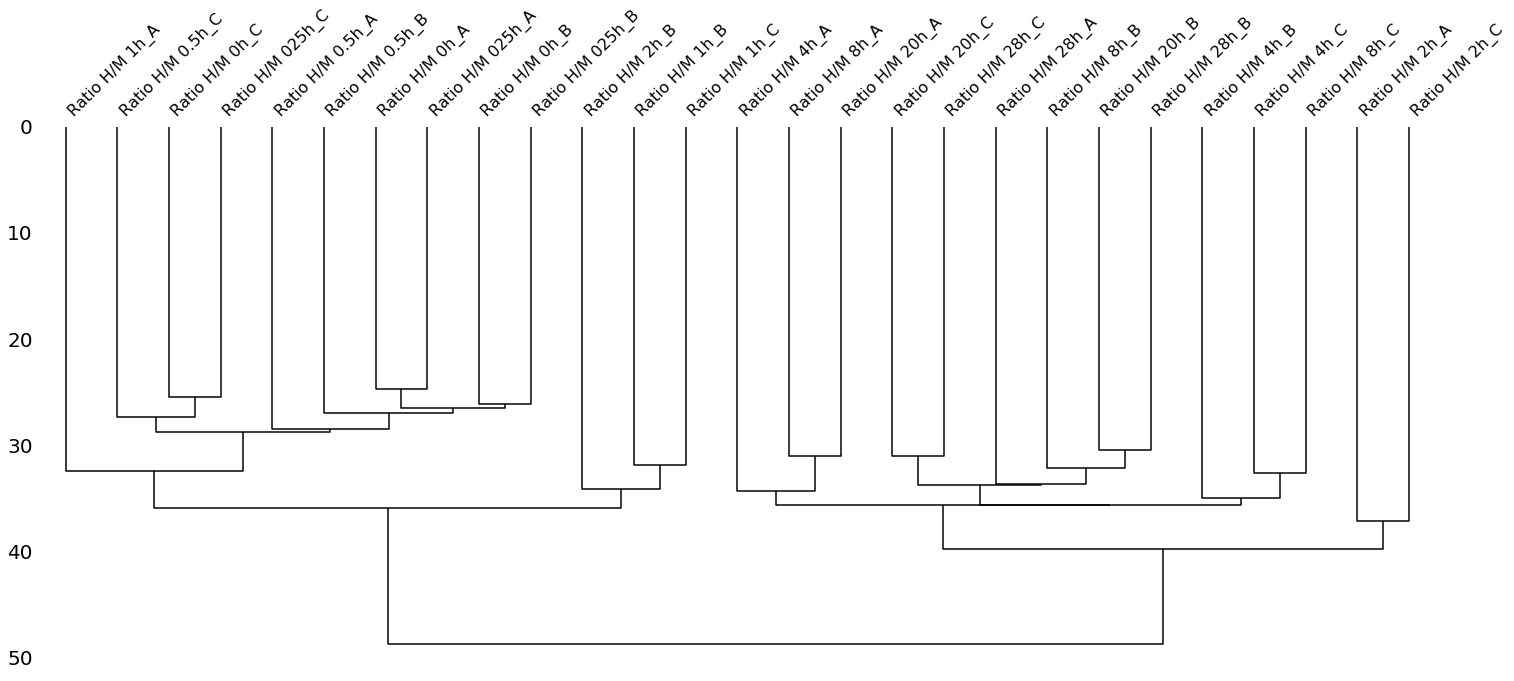

In [7]:
import missingno as msno
msno.matrix(data1.iloc[:,0:27])
plt.show()
msno.bar(data1.iloc[:,0:27])
plt.show()
msno.dendrogram(data1.iloc[:,0:27])

## Correlation Data Analysis
This part looks at the correletions between the time points. We expect to see a diagonal pattern as the closer experimental time points shuld be more similar

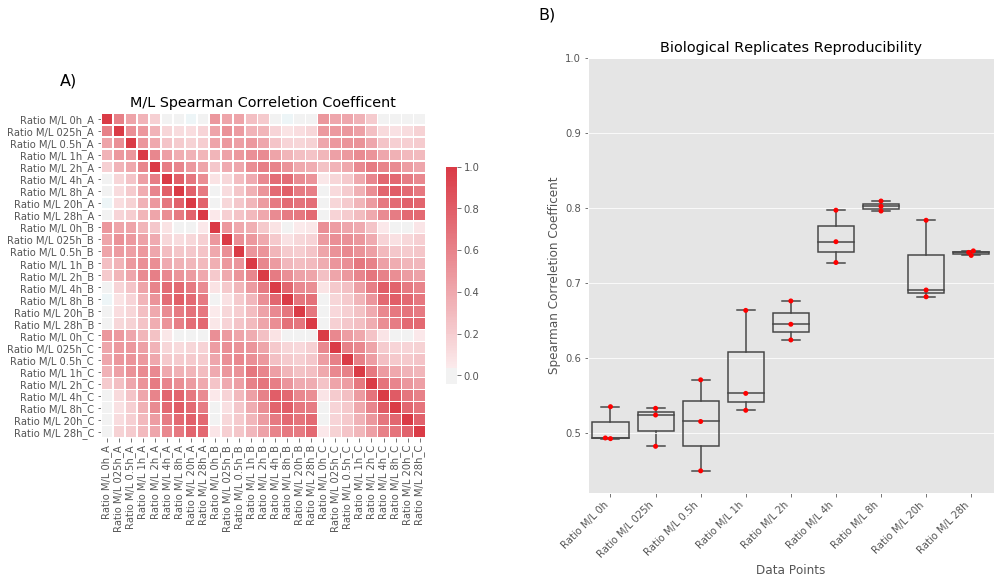

In [47]:
#plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

fig,axes = plt.subplots(figsize=(16,8),ncols=2,nrows=1)

plt.style.use('ggplot')
#corr = data1.fillna(data1.median()).corr()
corr = data3.corr(method='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#corr[corr<0.3]=0
sns.heatmap(corr,  cmap=cmap,  center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=axes[0])
           #mask=mask,)
axes[0].set_title('M/L Spearman Correletion Coefficent')

temp_list = []
mask = np.tril(np.ones_like(corr, dtype=np.bool), k=-1)
corr = corr.where(mask)
for n in range(9):
    cols = cols3[n::9]
    temp = corr.loc[cols][cols].unstack().dropna()
    temp = pd.Series(temp.values).to_frame()
    temp.columns = ['median']
    temp['data_point'] = cols3[n].split('_')[0]
    temp_list.append(temp)
temp_list=pd.concat(temp_list)
temp_list.head()

sns.boxplot(x="data_point", y="median", data=temp_list, zorder=.5,boxprops={'facecolor':'None'},ax=axes[1])
sns.swarmplot(x="data_point", y="median", data=temp_list, ax=axes[1], color='red')

#sns.swarmplot(x='data_point', y='median',ax=axes[1],data=temp_list)
axes[1].set_ylim(0.42,1)
for label in axes[1].get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)
axes[1].set_xlabel('Data Points')
axes[1].set_ylabel('Spearman Correletion Coefficent')
axes[1].set_title('Biological Replicates Reproducibility')
axes[1].text(-0.1, 1.1, 'B)', horizontalalignment='center', 
               verticalalignment='center',
               transform=axes[1].transAxes,fontsize=16)
axes[0].text(-0.1, 1.1, 'A)', horizontalalignment='center', 
               verticalalignment='center', 
               transform=axes[0].transAxes,fontsize=16)

plt.show()

[0.62062332 0.08645654]


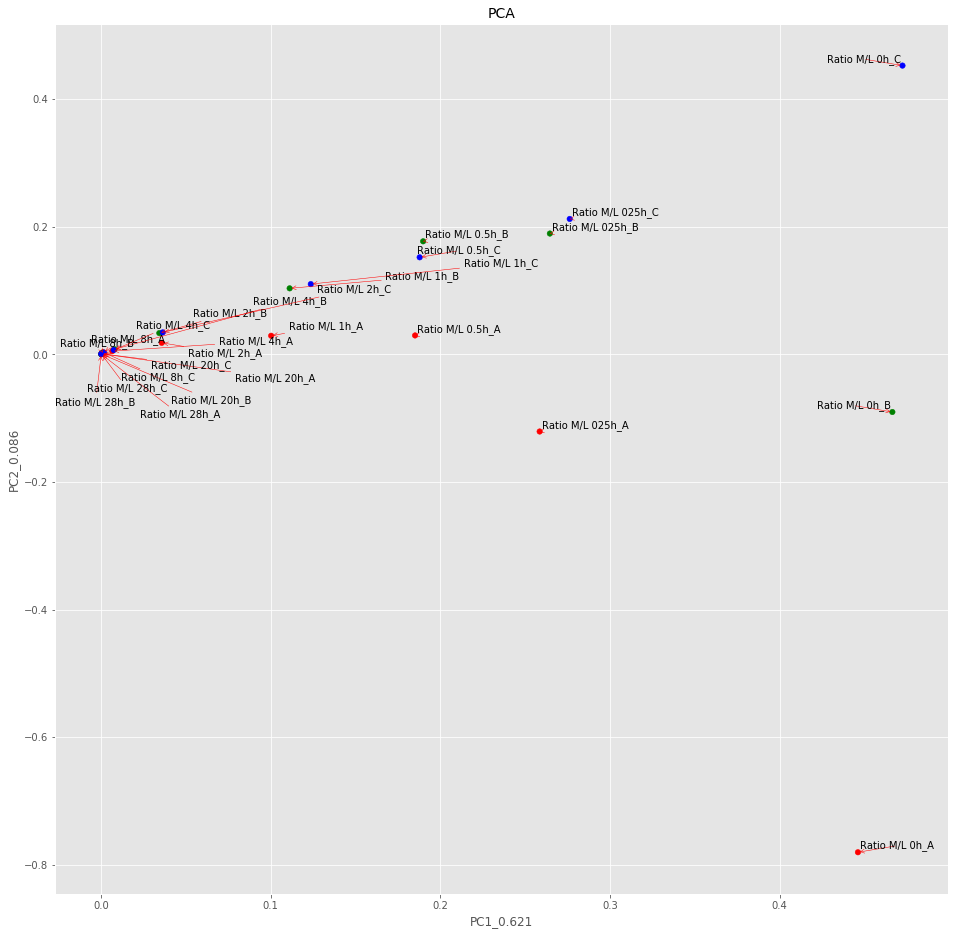

In [40]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D

import seaborn as sns
import os
from tqdm import tqdm
from tqdm import tqdm_notebook
import missingno as msno
from scipy import stats
import gc
import warnings
warnings.filterwarnings("ignore")

#define helping function
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from adjustText import adjust_text

def make_scatter_matrix(in_df):
    sns.set(font_scale = 1)
    #sns.set(style="white")
    def corrfunc(x, y, **kws):
        r, _ = stats.pearsonr(x, y)
        ax = plt.gca()
        ax.annotate("r = {:.3f}".format(r),
                    xy=(.1, .9), xycoords=ax.transAxes)

    g = sns.PairGrid(in_df, palette=["red"])
    g.map_upper(plt.scatter, s=10)
    g.map_diag(sns.distplot, kde=False)
    g.map_lower(sns.kdeplot, cmap="Blues_d")
    g.map_lower(corrfunc)
    plt.show()


def make_pca(in_df, palette, ax, top=500):
    cols = in_df.columns
    pca = PCA(n_components=2)

    sorted_mean = in_df.mean(axis=1).sort_values()
    select = sorted_mean.tail(top)
    #print(top)
    in_df = in_df.loc[select.index.values]
    pca.fit(in_df)
    temp_df = pd.DataFrame()
    temp_df['pc_1']=pca.components_[0]
    temp_df['pc_2']=pca.components_[1]
    temp_df.index = cols
    print(pca.explained_variance_ratio_)
    temp_df['color']=palette
    #fig,ax=plt.subplots(figsize=(12,6))
    temp_df.plot(kind='scatter',x='pc_1',y='pc_2',s=30, c=temp_df['color'], ax=ax)
    #print(temp_df.index.values)

    texts = [ax.text(temp_df.iloc[i]['pc_1'],
                       temp_df.iloc[i]['pc_2'],
                       cols[i])
                       for i in range(temp_df.shape[0])]


    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'),ax=ax)
    ax.set_title('PCA', size=14)
    ax.set_xlabel('PC1_{:.3f}'.format(pca.explained_variance_ratio_[0]),size=12)
    ax.set_ylabel('PC2_{:.3f}'.format(pca.explained_variance_ratio_[1]),size=12)
    ax.yaxis.label.set_size(12)
    ax.xaxis.label.set_size(12)



def make_mds(in_df, palette, ax, top=500):
    cols = in_df.columns
    pca = MDS(n_components=2,metric=True)

    sorted_mean = in_df.mean(axis=1).sort_values()
    select = sorted_mean.tail(top)
    #print(top)
    in_df = in_df.loc[select.index.values]
    temp_df = pd.DataFrame(pca.fit_transform(in_df.T),
                                 index=cols,columns =['pc_1','pc_2'] )

    temp_df['color']=palette

    temp_df.plot(kind='scatter',x='pc_1',y='pc_2',s=50, c=temp_df['color'], ax=ax)
    #print(temp_df.index.values)

    texts = [ax.text(temp_df.iloc[i]['pc_1'],
                       temp_df.iloc[i]['pc_2'],
                       cols[i])
                       for i in range(temp_df.shape[0])]

    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'),ax=ax)
    ax.set_title('MDS',size=14)
    ax.set_xlabel('DIM_1',size=12)
    ax.set_ylabel('DIM_2',size=12)
    ax.yaxis.label.set_size(12)
    ax.xaxis.label.set_size(12)


    
fig,axes=plt.subplots(ncols=1,nrows=1,figsize=(16,16))    
my_palette = ['r']*9+['g']*9+['b']*9
make_pca(data3.dropna(), my_palette,axes,top=2000) 

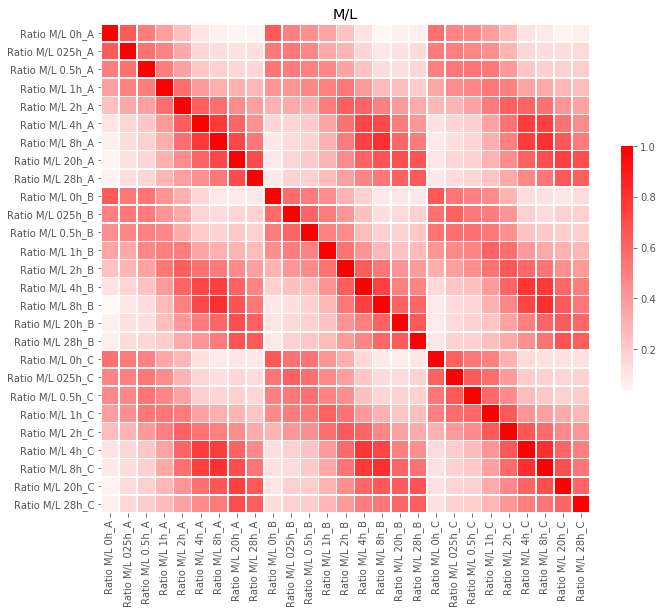

In [18]:
#plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
#corr = data3.fillna(data3.median()).corr()
corr = data3.corr()
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#corr[corr<0.4]=0
sns.heatmap(corr,  cmap='bwr',  center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) #mask=mask,
plt.title('M/L')
plt.show()

[0.62062332 0.08645654]


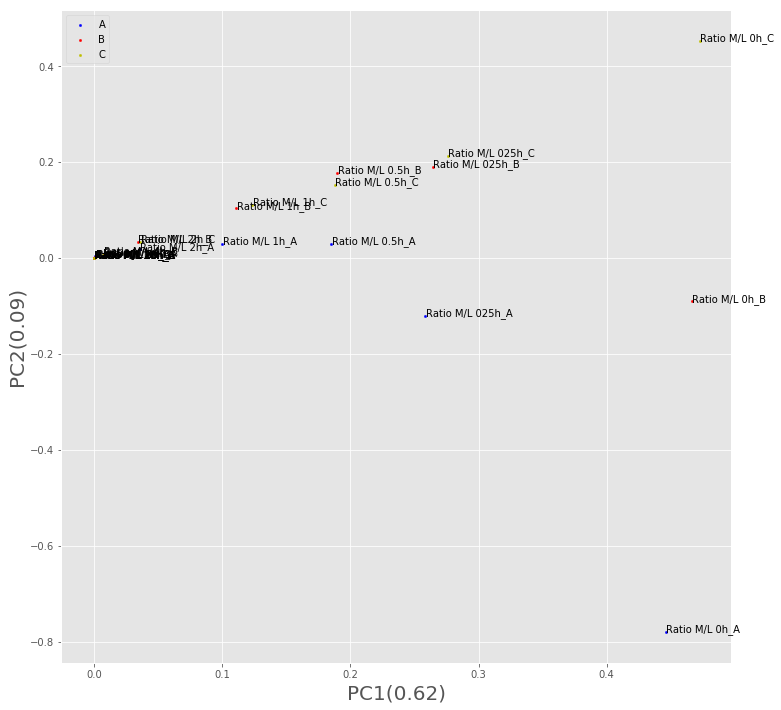

In [11]:
from sklearn.decomposition import PCA
#plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

def make_pca(in_df, step=9, title=''):
    cols = in_df.columns
    #in_df=in_df.drop(drop,axis=1)
    pca = PCA(n_components=2)
    pca.fit(in_df)
    temp_df = pd.DataFrame()
    temp_df['pc_1']=pca.components_[0]
    temp_df['pc_2']=pca.components_[1]
    temp_df.index = cols
    #print (temp_df)
    print(pca.explained_variance_ratio_)
    fig,ax=plt.subplots(figsize=(12,12))
    temp_df.iloc[0:step,:].plot(kind='scatter',x='pc_1',y='pc_2',s=5, c='b', ax=ax, label = 'A')
    #print(temp_df.iloc[0:step,:])
    temp_df.iloc[step:step*2,:].plot(kind='scatter',x='pc_1',y='pc_2',s=5, c='r', ax=ax, label='B')    
    temp_df.iloc[step*2:step*3,:].plot(kind='scatter',x='pc_1',y='pc_2',s=5, c='y', ax=ax, label='C')
    for i, txt in enumerate(cols):
        ax.annotate(txt, (temp_df['pc_1'].values[i]+0.0003,temp_df['pc_2'].values[i]))
    ax.set_xlabel('PC1({})'.format(round(pca.explained_variance_ratio_[0],2)))
    ax.set_ylabel('PC2({})'.format(round(pca.explained_variance_ratio_[1],2)))
    #ax.set_xlim(0.345,0.360)
    #ax.set_xlabel('PC1')
    #ax.set_ylabel('PC2')
    ax.yaxis.label.set_size(20)
    ax.xaxis.label.set_size(20)
    #plt.tick_params(axis='both', which='major', labelsize=16, rotation=70, horizontalalignment='right' )
    #plt.setp( axs[1].xaxis.get_majorticklabels(), )
    #fig.savefig('pca.svg')
    #fig.savefig('pca.png')
    #fig.savefig('pca.pdf')
    plt.legend()
    plt.show()

make_pca(data3.dropna()) 

[0.6204898 0.0808052]


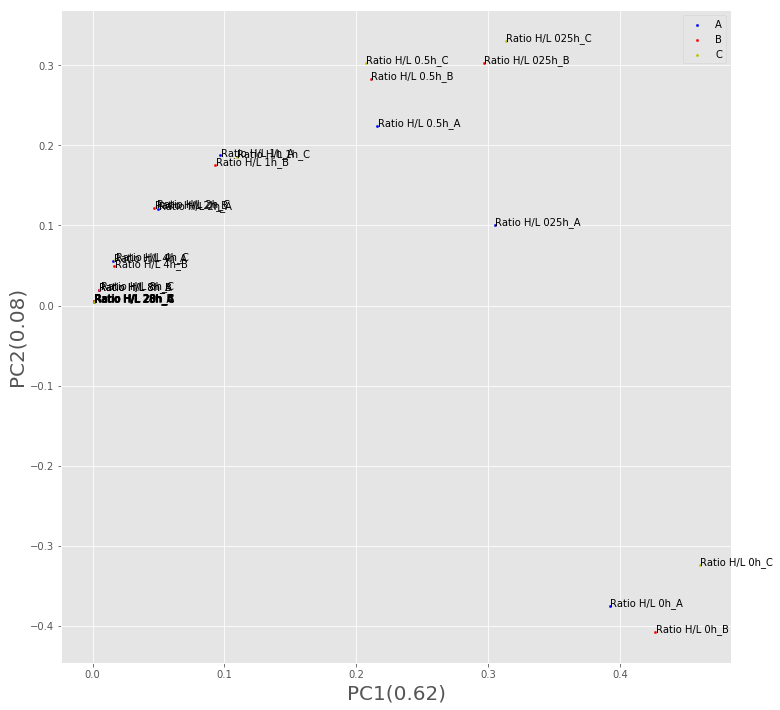

In [12]:
make_pca(data2.dropna())

[0.92183563 0.05094169]


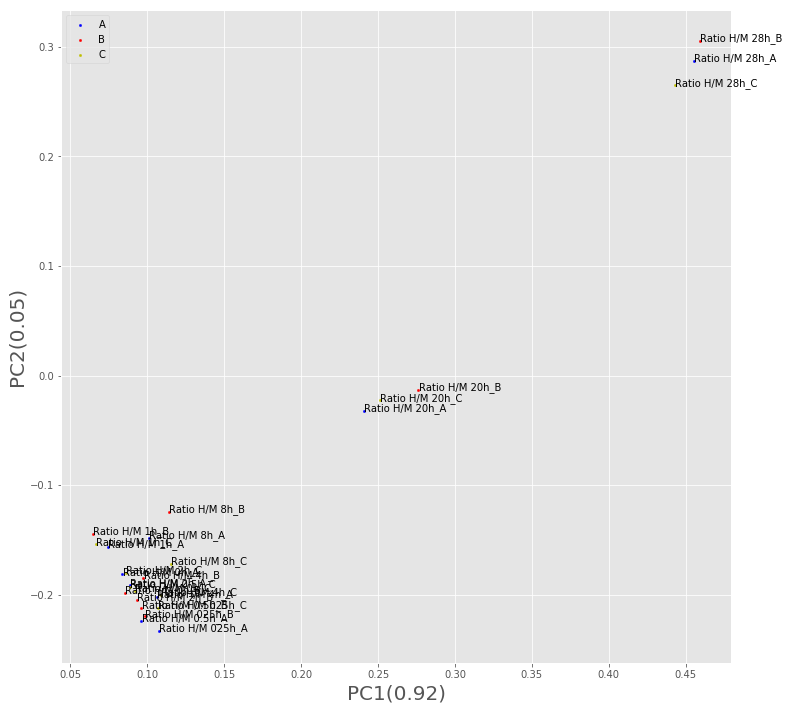

In [13]:
make_pca(data1.dropna())

### Median Degradation Profile

(5895, 27)


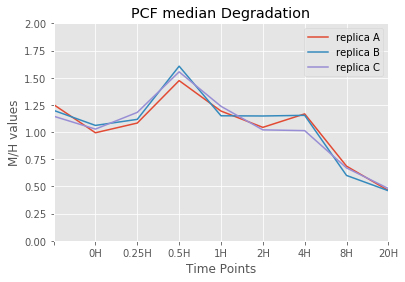

(5895, 27)


In [16]:
plt.style.use('ggplot')
bs_cols = [ 'Ratio H/M {tp}{rep}'.format(tp=tp, rep=rep) for rep in _TAG_REPLICA for tp in _TAG]
deg_data = df[bs_cols]

print (deg_data.shape)
deg_data=1/deg_data
fig,ax=plt.subplots()
deg_data.iloc[:,0:9].median().plot(kind='line',ax=ax,label='replica A')
deg_data.iloc[:,9:18].median().plot(kind='line',ax=ax,label='replica B')
deg_data.iloc[:,18:27].median().plot(kind='line',ax=ax,label='replica C')

#little hack
ax.set_xticklabels(['']+[str(n)+'H' for n in _Hours])
ax.set_xlabel('Time Points')
ax.set_ylabel('M/H values')
plt.title('PCF median Degradation')
plt.legend()
plt.ylim(0,2)
plt.show()
print (deg_data.shape)

### Median synthesis profile

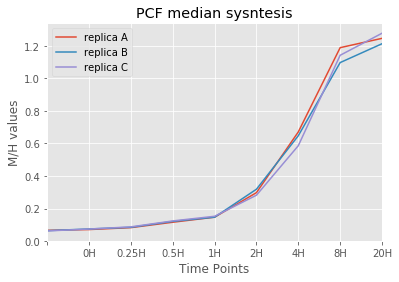

(5895, 27)

In [17]:
plt.style.use('ggplot')
cols = ['Ratio H/L {tp}{rep}'.format(tp=tp, rep=rep) for rep in _TAG_REPLICA for tp in _TAG]
sin_data = df[cols]

sin_data=1/sin_data
fig,ax=plt.subplots()
sin_data.iloc[:,0:9].median().plot(kind='line',ax=ax,label='replica A')
sin_data.iloc[:,9:18].median().plot(kind='line',ax=ax,label='replica B')
sin_data.iloc[:,18:27].median().plot(kind='line',ax=ax,label='replica C')
#little hack
ax.set_xticklabels(['']+[str(n)+'H' for n in _Hours])
ax.set_xlabel('Time Points')
ax.set_ylabel('M/H values')
plt.title('PCF median sysntesis')
plt.legend()
plt.show()
deg_data.shape

### Data Normalization and Cell Division Correction

In [18]:
#little trick, if we set same columns name
#we can do operation on entire dataframe
deg_data.columns = [b + a for a in _TAG_REPLICA for b in _TAG]
sin_data.columns = [b+ a for a in _TAG_REPLICA for b in _TAG]

#normalization
deg_data=deg_data/(deg_data+sin_data)

#growth factor correction
deg_data = deg_data*(_GROWTH_FACTOR)
deg_data.shape

(5895, 27)

In [19]:
print(deg_data.shape)
deg_data.head()

(5895, 27)


,0h_A,025h_A,0.5h_A,1h_A,2h_A,4h_A,8h_A,20h_A,28h_A,0h_B,...,28h_B,0h_C,025h_C,0.5h_C,1h_C,2h_C,4h_C,8h_C,20h_C,28h_C
protein_id,,,,,,,,,,,,,,,,,,,,,
Tb927.5.4450,NaN,NaN,NaN,NaN,NaN,0.806257,0.613254,0.363577,0.294020,NaN,...,0.258285,NaN,NaN,NaN,0.969097,0.932706,0.804186,0.651418,0.389308,0.282735
Tb927.5.4460,NaN,NaN,0.920623,NaN,0.927513,0.881835,0.767122,0.435937,0.331637,NaN,...,0.311502,0.938502,0.938015,NaN,0.972545,0.959288,0.841176,0.746439,0.442146,0.310078
Tb927.5.4470,NaN,NaN,NaN,NaN,0.850046,0.718234,0.526867,0.284066,0.145569,NaN,...,0.208142,NaN,NaN,0.757162,NaN,0.880486,0.739012,0.531159,NaN,0.291859
Tb927.5.4480,0.940893,0.907011,0.904121,0.939990,0.896921,0.807715,0.701846,0.426154,0.325024,0.939002,...,0.317768,0.938984,0.915895,0.906684,0.899439,0.854198,0.823202,0.675715,0.389552,0.304305
Tb927.5.4500,0.946735,0.931802,0.929127,0.917865,0.871949,0.771979,0.627461,0.360660,0.301985,0.946252,...,0.257409,0.946010,0.926772,0.927732,0.917921,0.886602,0.808561,0.615278,0.390830,0.285595


### Median Normalized Degradetion Profile

(5895, 27)


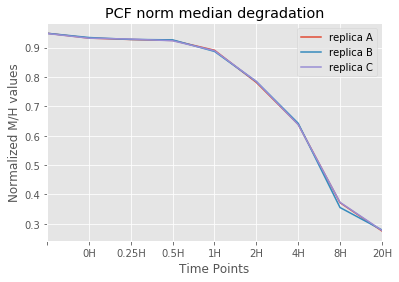

In [23]:
plt.style.use('ggplot')
print (deg_data.shape)
fig,ax=plt.subplots()
deg_data.iloc[:,0:9].median().plot(kind='line',ax=ax,label='replica A')
deg_data.iloc[:,9:18].median().plot(kind='line',ax=ax,label='replica B')
deg_data.iloc[:,18:27].median().plot(kind='line',ax=ax,label='replica C')
ax.set_xticklabels(['']+[str(n)+'H' for n in _Hours])
ax.set_xlabel('Time Points')
ax.set_ylabel('Normalized M/H values')
plt.title('PCF norm median degradation')
plt.legend()
plt.show()

(5895, 27)


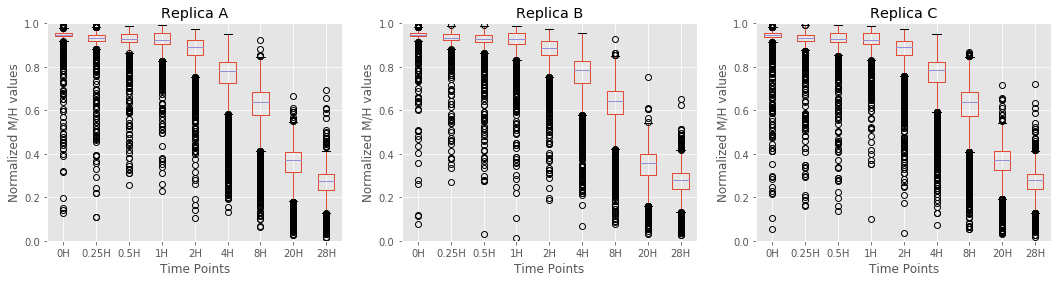

(5895, 27)

In [24]:
warnings.filterwarnings("ignore")
print (deg_data.shape)
fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(18,4))
deg_data.iloc[:,0:9].plot(kind='box',ax=ax[0])
deg_data.iloc[:,9:18].plot(kind='box',ax=ax[1])
deg_data.iloc[:,18:27].plot(kind='box',ax=ax[2])
ax[0].set_title('Replica A')
ax[1].set_title('Replica B')
ax[2].set_title('Replica C')
ax[0].set_ylim(0,1)
ax[1].set_ylim(0,1)
ax[2].set_ylim(0,1)

ax[0].set_xticklabels([str(n)+'H' for n in _Hours])
ax[1].set_xticklabels([str(n)+'H' for n in _Hours])
ax[2].set_xticklabels([str(n)+'H' for n in _Hours])

ax[0].set_xlabel('Time Points')
ax[0].set_ylabel('Normalized M/H values')
ax[1].set_xlabel('Time Points')
ax[1].set_ylabel('Normalized M/H values')
ax[2].set_xlabel('Time Points')
ax[2].set_ylabel('Normalized M/H values')

plt.show()
deg_data.shape

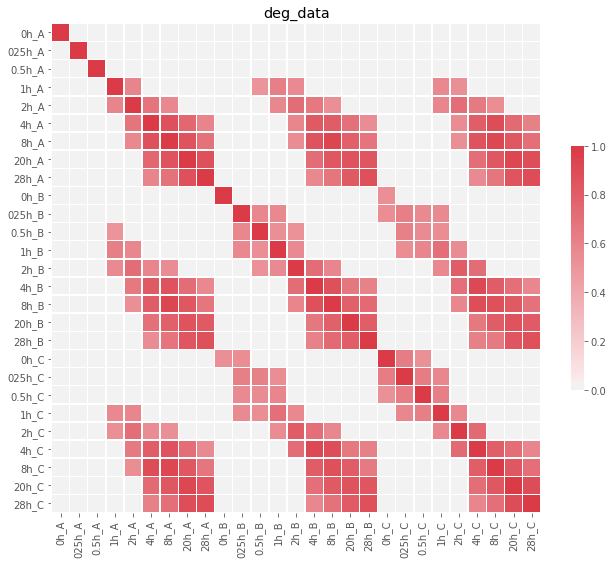

In [25]:
#plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
corr = deg_data.fillna(deg_data.median()).corr()
corr = deg_data.dropna().corr()
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
corr[corr<0.5]=0
sns.heatmap(corr,  cmap=cmap,  center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) #mask=mask,
plt.title('deg_data')
plt.show()

### Save Data

In [26]:
deg_data.iloc[:,0:21].head()
deg_data.to_csv(os.path.join('outdata','data_PCF.csv'))